Edit  From : QZJ、HRQ、CQY、LZC<br>
Data name: Statlog (German Credit Data) Data Set<br>
   From : https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29<br>
Attribute Information;<br>
Data information:<br>
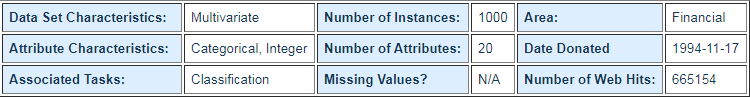
Download data in Folder Data(german.data->german.xlsx) 

### 1. origial data to german_credit.csv

In [51]:
import pandas as pd
import numpy as np

# 导入数据，数据已由.data -> .xlsx
data = pd.read_excel('./data/german.xlsx')
data.head()  # 查看前5条数据

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,1,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,1,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,2,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
# 查看数据结构和类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null object
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null object
Purpose                              1000 non-null object
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null object
Length of current employment         1000 non-null object
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null object
Guarantors                           1000 non-null object
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null object
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null object
Type of apartment             

#### 1.1 data change

In [52]:
Anames = [
    'Account Balance'
    ,'Payment Status of Previous Credit'
    ,'Purpose'
    ,'Value Savings/Stocks'
    ,'Length of current employment'
    ,'Length of current employment'
    ,'Sex & Marital Status'
    ,'Guarantors'
    ,'Most valuable available asset'
    ,'Concurrent Credits'
    ,'Type of apartment'
    ,'Occupation'
    ,'Telephone'
    ,'Foreign Worker'
]
for name in Anames:
    if name == 'Purpose':
        data[name]=data[name].apply(lambda x:x[2:])  # 只有Purpose属性有需要后两位的情况（其他取最后一位）
    else:
        data[name]=data[name].apply(lambda x:x[-1])  # 截取最后一行
        
# 标签转换2->0
data['Creditability']=data['Creditability'].apply(lambda x:0 if x==2 else 1)
# 全部转为int
data = data.astype('int')

In [8]:
# 数据转换后的数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int32
Account Balance                      1000 non-null int32
Duration of Credit (month)           1000 non-null int32
Payment Status of Previous Credit    1000 non-null int32
Purpose                              1000 non-null int32
Credit Amount                        1000 non-null int32
Value Savings/Stocks                 1000 non-null int32
Length of current employment         1000 non-null int32
Instalment per cent                  1000 non-null int32
Sex & Marital Status                 1000 non-null int32
Guarantors                           1000 non-null int32
Duration in Current address          1000 non-null int32
Most valuable available asset        1000 non-null int32
Age (years)                          1000 non-null int32
Concurrent Credits                   1000 non-null int32
Type of apartment                    10

In [9]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,6,4,3,1169,5,5,4,3,...,4,1,67,3,2,2,3,1,2,1
1,0,2,48,2,3,5951,1,3,2,2,...,2,1,22,3,2,1,3,1,1,1
2,1,4,12,4,6,2096,1,4,2,3,...,3,1,49,3,2,1,2,2,1,1
3,1,1,42,2,2,7882,1,4,2,3,...,4,2,45,3,3,1,3,2,1,1
4,0,1,24,3,0,4870,1,3,3,3,...,4,4,53,3,3,2,3,2,1,1


In [8]:
# 写入处理后的数据
# data.to_csv('./data/german_credit.csv')

#### 1.2 data 简单统计分析
##### a.分析存款目的与存款之间的关系

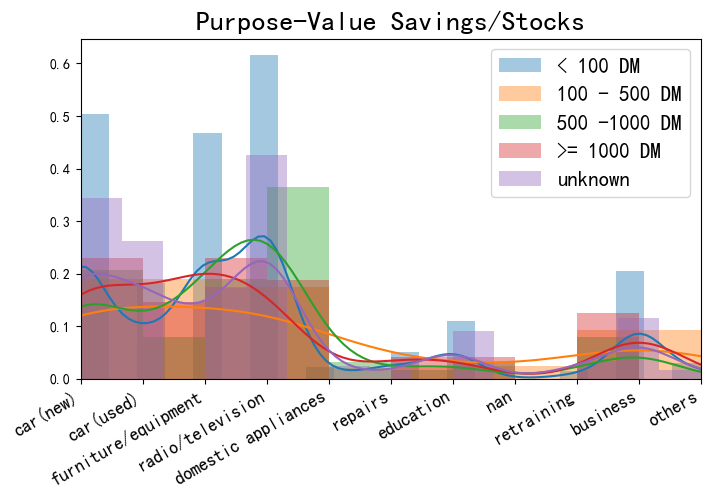

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False   #显示负号

#创建画布
fig = plt.figure(figsize = (8,5),dpi = 100)   # dpi像素
ax = fig.add_subplot(1,1,1)

labels = ['< 100 DM'
          ,'100 - 500 DM'
          ,'500 -1000 DM'
          ,'>= 1000 DM'
         ,'unknown']

#对每一种类型的进行绘图
for i in range(1,6):
    sns.distplot(data.loc[data['Value Savings/Stocks']==i,'Purpose'].values,label=labels[i-1])

#添加装饰
plt.title('Purpose-Value Savings/Stocks',fontsize=20)
ax.set_xlim(0,10)  # x轴范围
ax.set_xticks([*range(0,11)])
ax.set_xticklabels(['car(new)'
                     ,'car(used)'
                     ,'furniture/equipment'
                     ,'radio/television'
                     ,'domestic appliances'
                     ,'repairs'
                     ,'education'
                     ,'nan'
                     ,'retraining'
                     ,'business'
                     ,'others'],fontsize=13)
fig.autofmt_xdate()
plt.legend(fontsize=15);

发现:<br>
    存款小于100的贷款目的大多集中在购买新车、家具、电器上<br>
    ....

##### b.分析是否违约的性别状态的关系

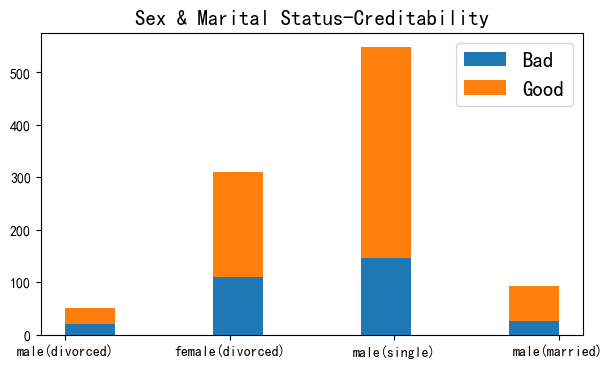

In [11]:
data_agg = data.loc[:,['Creditability','Sex & Marital Status']].groupby('Creditability')
vals =[data0['Sex & Marital Status'].values.tolist() for i,data0 in data_agg]  # 一类装一列表
fig = plt.figure(figsize = (7,4),dpi = 100)
ax = fig.add_subplot(1,1,1)
plt.hist(vals,10,stacked=True)  # 直方图
ax.set_xticks([*range(1,5)])
ax.set_xticklabels(['male(divorced)'
                     ,'female(divorced)'
                     ,'male(single)'
                     ,'male(married)'
                    ],fontsize=10)
plt.title('Sex & Marital Status-Creditability',fontsize=15)
plt.legend(['Bad','Good'],fontsize=15)

##### c.分析是否违约的年龄分布

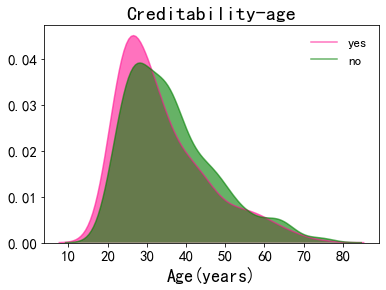

In [12]:
yes = data.loc[data.Creditability==0,'Age (years)'].values
no =  data.loc[data.Creditability==1,'Age (years)'].values

sns.kdeplot(yes,shade=True,color='deeppink',alpha=0.6,label='yes')   # 密度图
sns.kdeplot(no,shade=True,color='green',alpha=0.6,label='no')  # 密度图


#添加装饰
plt.title('Creditability-age',fontsize=20)
plt.xlabel('Age(years)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=13,loc=0,frameon=False)

### 2.german_credit.csv  to  Test and Training

In [13]:
# data = pd.read_csv('./data/german_credit.csv',index_col= None)
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,6,4,3,1169,5,5,4,3,...,4,1,67,3,2,2,3,1,2,1
1,0,2,48,2,3,5951,1,3,2,2,...,2,1,22,3,2,1,3,1,1,1
2,1,4,12,4,6,2096,1,4,2,3,...,3,1,49,3,2,1,2,2,1,1
3,1,1,42,2,2,7882,1,4,2,3,...,4,2,45,3,3,1,3,2,1,1
4,0,1,24,3,0,4870,1,3,3,3,...,4,4,53,3,3,2,3,2,1,1


In [14]:
from sklearn.model_selection import train_test_split 

X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

### 3.选择最好随机森林（深度，n_tree)

In [15]:
from sklearn.model_selection import KFold   # 交叉验证
# 模型选取
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,log_loss
import time


# 最大的树个数
print('Finding best n_estimators for RandomForestClassifier...')
min_score = 100000  #迭代更新，让logloss最小
best_n = 0    # 树的最好棵数
scores_n  =[]  #  记录分数

# 树的量
range_n = range(10,100,10)
for n in range_n:
    print("the number of tree :{0}".format(n))
    t1 = time.time()  # 记录时间
    rfc_score = 0.
    rfc = RandomForestClassifier(n_estimators=n)  # 关键一步
    #划分训练集和验证集,交叉验证
    for train_x,val_x in KFold(5,shuffle=True).split(X_train):  # KFold交叉验证
        rfc.fit(X_train.iloc[train_x],y_train.iloc[train_x])  # 模型训练 
        pred = rfc.predict(X_train.iloc[val_x])  # 对验证集的预测
        rfc_score += log_loss(y_train.iloc[val_x],pred)/5 #对所有验证集的总评估
    scores_n.append(rfc_score)
    # 迭代更新书的棵树和得分
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n
        
    t2 = time.time()  # 记录时间
    print('Done processing {0} trees ({1:.3f}sec)'.format(n,t2-t1))
print(best_n,min_score)


# 最大的深度，只是改变了深度参数
print('Finding best max_depth for RandomForestClassifier...')
min_score = 100000  #迭代更新，让logloss最小
best_m = 0  
scores_m  =[]
# 树的数量 0代表10的0次方，2代表10的2次方 ，即1,10,100
# range_m  = np.logspace(0,2,num = 3).astype(int)  
range_m = range(10,200,10)
for m in range_m:
    print("the number of tree :{0}".format(m))
    t1 = time.time()
    rfc_score = 0.
    rfc = RandomForestClassifier(max_depth=m,n_estimators=best_n)
    #划分训练集和验证集,交叉验证
    for train_x,val_x in KFold(5,shuffle=True).split(X_train):  # KFold需要注意的新版本
        rfc.fit(X_train.iloc[train_x],y_train.iloc[train_x])
        pred = rfc.predict(X_train.iloc[val_x])  # 对验证集的预测
        rfc_score += log_loss(y_train.iloc[val_x],pred)/5 #对所有验证集的总评估
    scores_m.append(rfc_score)
    # 迭代更新书的棵树和得分
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
        
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(m,t2-t1))  # 花费时间，小数点后3位
print(best_m,min_score)

Finding best n_estimators for RandomForestClassifier...
the number of tree :10
Done processing 10 trees (0.167sec)
the number of tree :20
Done processing 20 trees (0.268sec)
the number of tree :30
Done processing 30 trees (0.375sec)
the number of tree :40
Done processing 40 trees (0.588sec)
the number of tree :50
Done processing 50 trees (0.633sec)
the number of tree :60
Done processing 60 trees (0.709sec)
the number of tree :70
Done processing 70 trees (0.823sec)
the number of tree :80
Done processing 80 trees (0.929sec)
the number of tree :90
Done processing 90 trees (1.025sec)
70 7.993394469246134
Finding best max_depth for RandomForestClassifier...
the number of tree :10
Done processing 10 trees (0.799sec)
the number of tree :20
Done processing 20 trees (0.815sec)
the number of tree :30
Done processing 30 trees (0.809sec)
the number of tree :40
Done processing 40 trees (0.809sec)
the number of tree :50
Done processing 50 trees (0.856sec)
the number of tree :60
Done processing 60 tr

Text(0.5, 0, 'max depth')

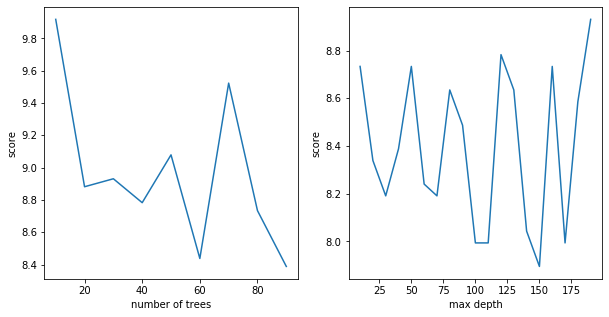

In [37]:
# 可视化最优参数组合
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n,scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

### 4.特征选择
#### 在最优参数下用随机森林进行特征选择

Feature Importances

[0.11377824 0.0987281  0.07230743 0.05786213 0.1407434  0.04682656
 0.05028148 0.04045422 0.03130402 0.01591425 0.03869861 0.04613777
 0.10298678 0.03351468 0.02695297 0.02045141 0.02905041 0.01169221
 0.01833589 0.00397948]
Top 10 Features:
1. feature 4 (0.140743)
2. feature 0 (0.113778)
3. feature 12 (0.102987)
4. feature 1 (0.098728)
5. feature 2 (0.072307)
6. feature 3 (0.057862)
7. feature 6 (0.050281)
8. feature 5 (0.046827)
9. feature 11 (0.046138)
10. feature 7 (0.040454)


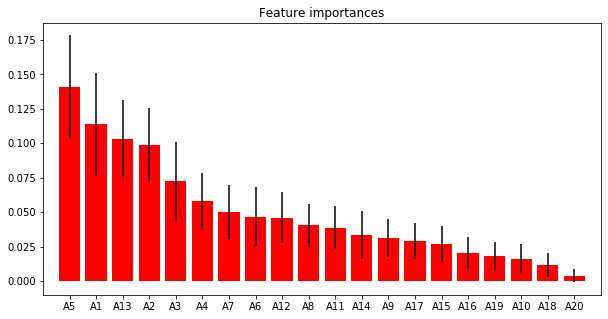

Mean Feature Importance 0.050000


In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


max_depth=best_m 
n_estimators=best_n
estimator = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth) 
estimator.fit(X_train,y_train) 
print("Feature Importances\n") 
print(estimator.feature_importances_) 

# Calculate the feature ranking - Top 10 
importances = estimator.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0) 
indices = np.argsort(importances)[::-1] 
print("Top 10 Features:") 
for f in range(10): 
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])) 
    
#Plot the feature importances of the forest 
indices=indices[:20] 
plt.figure(figsize=(10,5)) 
plt.title("Feature importances") 
plt.bar(range(20), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(20), ['A'+ str(i+1) for i in indices]) 
plt.xlim([-1, 20]) 
plt.show() 


#Mean Feature Importance 
print("Mean Feature Importance %.6f" %np.mean(importances))

#### 4.1 特性选择后的数据及预处理

In [53]:
from sklearn.model_selection import train_test_split 

# 特征选择
best_index = [i+1 for i in [4,0,1,12,2,3,6,5,11,7,10,8]]
X = data.iloc[:,best_index]
y = data.iloc[:,0]
# 划分
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# 标准化
X_train_new = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test_new = (X_test-X_test.min())/(X_test.max()-X_test.min())
# y_label,y_test 不变

数据标准化

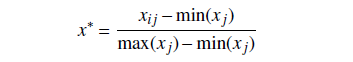
使用这种方法的目的包括：<br>

1、对于方差非常小的属性可以增强其稳定性。<br>

2、维持稀疏矩阵中为0的条目。

### 5. XGboost网格搜寻法（GS）

#### 5.1简单的XGboost（默认参数）

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train_new,y_train)
y_pre = model.predict(X_test_new)
prediction = accuracy_score(y_test,y_pre)
print(f'prediction:{prediction}')

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

#### 5.1.1 查看特征重要性（与随机森林进行特征选择结果一致）

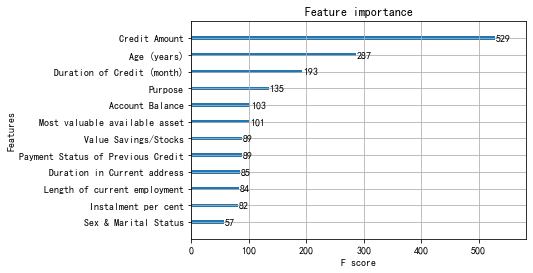

In [19]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

#### 5.2 网络搜寻法

参数调节<br>
1. learning_rata，论文要求[0.05,1],步长为0.01<br> 
2. tree:<br>
   max_depth<br>
   n_estimators，论文要求范围为[1,300], 步长为3<br>
3. 正则化参数<br>
   labdam<br>
   aplha

####  下面代码块我跑一次好久，~2个多钟

In [20]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold

# model = XGBClassifier()
# learning_rate = np.arange(0.05,1.01,0.01)
# n_estimators = np.arange(1,303,3)
# param_grid = dict(learning_rate = learning_rate,n_estimators=n_estimators)
# kFlod = StratifiedKFold(n_splits=5,shuffle=True,random_state = 7)
# grid_search = GridSearchCV(model,param_grid,scoring = 'accuracy',n_jobs=1,cv=kFlod)  #n_jobs=1,cpu核
# grid_result = grid_search.fit(X_train_new,y_train)
# print(grid_result.best_score_,grid_result.best_params_)

0.7885714285714285 {'learning_rate': 0.5900000000000002, 'n_estimators': 43}


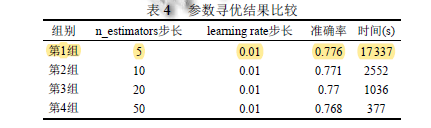
可见，最终的准确率比论文的高<br>
最优参数组为：<br>
learning_rate : 0.59<br>
n_estimators : 43

#### 网格搜索可视化

由于运行时间比较长，我将结构保存并将运行代码注释

In [21]:
# parmas = grid_result.cv_results_['params']
# means = grid_result.cv_results_['mean_test_score']

In [1]:
# for mean,param in zip(means,parmas):
#     print(mean,param)

In [44]:
# params = pd.DataFrame(means)
# l = []
# n_ = []
# for i in parmas:
#     l.append(i['learning_rate'])
#     n_.append(i['n_estimators'])
# params['learning'] = l
# params['n_estimators'] = n_
# params.to_csv('./data/params.csv')

导入参数数据

In [15]:
import pandas as pd

pas = pd.read_csv('./data/params.csv')
acc = pas['0']
learning = np.array(pas['learning'])
n_estimators = np.array(pas['n_estimators'])

<IPython.core.display.Javascript object>


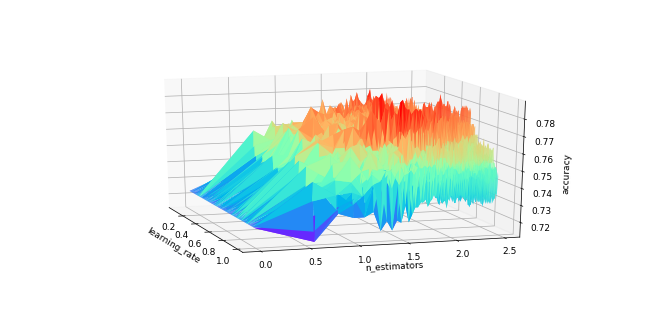

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 动态调整
%matplotlib notebook

fig = plt.figure(figsize=(10,5))
n_estim = np.log10(n_estimators)  # 论文中的操作
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(learning,n_estim,acc,cmap='rainbow')
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')  # plt.zlabel('accuracy')不可用
ax.set_zlabel('accuracy')
plt.show()

#### 5.3 XGboost最优参数模型

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(learning_rate= 0.59,n_estimators=43)
model.fit(X_train_new,y_train)
y_pre = model.predict(X_test_new)
prediction = accuracy_score(y_test,y_pre)
print(f'prediction:{prediction}')

prediction:0.7066666666666667


#### 5.4 对比模型，SVM

In [56]:
from sklearn.svm import SVC

 
# grid search start
best_score = 0
for gamma in [0.001,0.01,1,10,100]:
    for c in [0.001,0.01,1,10,100]:
        # 对于每种参数可能的组合，进行一次训练
        svm = SVC(gamma=gamma,C=c)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        # 找到表现最好的参数
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,"C":c}
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))

Best socre:0.69
Best parameters:{'gamma': 0.001, 'C': 0.001}
